In [9]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


In [10]:
# E-step
def EStep(k_size, data_x, lambda_vec, mu_vec, sigma2_vec):
    '''
    data_x[i]
    lambda[k]
    mu[k]
    sigma[k]
    '''
    I = len(data_x)
    # 中身を初期化せずに配列を作成する関数である。
    # 2行, 1000列の配列を生成
    responsibility = sp.empty((k_size, I))
    
    for k in sp.arange(k_size):
        norm = stats.norm(loc=mu_vec[k], scale=sp.sqrt(sigma2_vec[k]))
        responsibility[k] = norm.pdf(data_x)

    responsibility = responsibility / sp.sum(responsibility, axis=0)
    return responsibility

def MStep(k_size, responsibility, data_x):

    lambda_vec = sp.empty(k_size)
    mu_vec = sp.empty(k_size)
    sigma2_vec = sp.empty(k_size)

    for k in sp.arange(k_size):
        r_k = responsibility[k]
        #lambda_vec[k] = sp.sum(r_k) / sp.sum(responsibility)
        lambda_vec[k] = sp.sum(r_k) / responsibility.shape[1]
        mu_vec[k] = sp.sum(r_k * data_x) / sp.sum(r_k)
        mu_vec[k] = sp.sum(r_k * data_x) / sp.sum(r_k)
        sigma2_vec[k] = sp.sum(r_k * (data_x - mu_vec[k])**2) / sp.sum(r_k)

    return lambda_vec, mu_vec, sigma2_vec

In [11]:
def calc_mix_pdf(k_size, x, lambda_vec, mu_vec, sigma2_vec):
    pdf = sp.zeros_like(x)

    for k in sp.arange(k_size):
        norm_k = stats.norm(loc=mu_vec[k], scale=sp.sqrt(sigma2_vec[k]))
        
        # pdf (Probability density function) 確率密度関数
        # xのときの値を取得
        pdf += lambda_vec[k] * norm_k.pdf(x)
    return pdf

# データの作成

In [104]:
df = pd.read_excel("../../data/data_covid_fix_name.xlsx")
df = df.dropna().reset_index(drop=True)

In [105]:
df.head()

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,108641,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,303691,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
4,Australia,24992369,86.012,51663.365095,7.608913e+06,8.62,9.160533,8.07,26,97.3,1,1347,75667.65


In [111]:
y=np.log(df["date_first"]).values
X = df[["hf", "pop",  "urb", "gdp","dist", "air", "detection"]].values
X = np.log(X)
X = np.insert(X, 0, 1, axis=1)
pd.DataFrame(X, columns=["切片", "hf", "pop",  "urb", "gdp","dist", "air", "detection"])

,切片,hf,pop,urb,gdp,dist,air,detection
0,1.0,2.059239,14.868559,4.099647,9.500331,15.760924,5.714195,4.308111
1,1.0,1.607436,17.558604,4.285364,9.647420,16.024694,8.770663,2.484907
2,1.0,1.686399,17.243342,4.182264,8.772200,16.165944,4.343026,2.884801
3,1.0,1.925707,17.610876,4.520375,9.933559,16.761297,7.324246,4.316154
4,1.0,2.154085,17.034081,4.454487,10.852504,15.844831,11.234106,4.577799
...,...,...,...,...,...,...,...,...
145,1.0,1.335001,17.178320,4.479698,9.803805,16.527424,7.667519,2.163323
146,1.0,1.838961,18.375060,3.581266,8.915676,14.613322,10.758959,4.050044
147,1.0,1.458615,17.165369,3.601195,7.853654,15.602683,5.818033,2.197225
148,1.0,1.870263,16.669208,3.773244,8.348516,16.086144,2.186051,3.086487


In [112]:
y

array([4.24849524, 4.06044301, 4.41884061, 4.17438727, 3.25809654,
       4.06044301, 4.11087386, 4.34380542, 4.02535169, 4.24849524,
       4.09434456, 3.58351894, 4.44265126, 4.35670883, 4.20469262,
       4.29045944, 4.20469262, 4.53259949, 4.06044301, 4.26267988,
       4.2341065 , 4.27666612, 4.53259949, 3.36729583, 4.21950771,
       3.29583687, 4.40671925, 4.34380542, 4.39444915, 4.17438727,
       4.21950771, 4.34380542, 4.21950771, 4.29045944, 4.06044301,
       4.26267988, 4.14313473, 4.27666612, 4.07753744, 4.14313473,
       4.12713439, 3.8501476 , 4.38202663, 4.09434456, 4.31748811,
       4.39444915, 3.4339872 , 3.25809654, 4.30406509, 4.36944785,
       4.07753744, 3.36729583, 4.30406509, 4.07753744, 4.33073334,
       4.31748811, 4.47733681, 4.30406509, 4.29045944, 4.18965474,
       4.11087386, 3.4339872 , 4.14313473, 3.95124372, 4.04305127,
       4.12713439, 3.98898405, 3.4657359 , 4.29045944, 2.77258872,
       4.15888308, 4.33073334, 4.31748811, 4.02535169, 4.38202

(array([0.06713948, 0.        , 0.13427896, 0.30212766, 0.26855792,
        0.        , 0.20141844, 1.81276597, 1.91347519, 0.3356974 ]),
 array([2.63905733, 2.83764888, 3.03624043, 3.23483197, 3.43342352,
        3.63201507, 3.83060662, 4.02919817, 4.22778972, 4.42638126,
        4.62497281]),
 <a list of 10 Patch objects>)

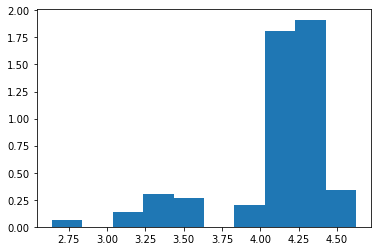

In [114]:
plt.hist(y, density=True)

# 初期値の設定  
- Rで計算済み

In [93]:
# coef_early = [21.790, 0.994, 0.000, -0.014, 0.000, 0.000, 0.000, -0.124]
coef_early = [-0.737, -0.331,0.041,0.258,-0.117,0.386,-0.106,-0.162]

pd.DataFrame(coef_early, index=["Intercept", "hf", "pop",  "urb", "gdp","dist", "air", "detection"])

,0
Intercept,-0.737
hf,-0.331
pop,0.041
urb,0.258
gdp,-0.117
dist,0.386
air,-0.106
detection,-0.162


In [94]:
# coef_late = [93.920, -0.915, 0.000, -0.213, 0.000, 0.000, 0.000, -0.116]
coef_late = [5.383,-0.014,-0.030,-0.073,-0.058,0.023,0.001,-0.046]

pd.DataFrame(coef_late, index=["Intercept", "hf", "pop",  "urb", "gdp","dist", "air", "detection"])

,0
Intercept,5.383
hf,-0.014
pop,-0.030
urb,-0.073
gdp,-0.058
dist,0.023
air,0.001
detection,-0.046


In [120]:
y_early = np.log(df["date_first"][df["date_first"]<40])
y_late = np.log(df["date_first"][df["date_first"]>40])

sigma1_first = np.sum((y_early - np.mean(y))**2)/len(y_early)
sigma2_first = np.sum((y_late - np.mean(y))**2)/len(y_late)

In [97]:
# 混合正規分布の数
k_size = 2

# 正規分布の割合
lambda_vec=[0.5, 0.5]

# 説明変数のパラメータ
coef = [coef_early, coef_late]

# 分散(sigma)の初期値
sigma2_vec=[sigma1_first, sigma2_first]

In [99]:
coef

[[-0.737, -0.331, 0.041, 0.258, -0.117, 0.386, -0.106, -0.162],
 [5.383, -0.014, -0.03, -0.073, -0.058, 0.023, 0.001, -0.046]]